In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly_express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('car_price.csv')
data.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,index,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [23]:
data[['car_company_name', 'car_model_name', "car_model_details"]] = data['car_name'].str.split(' ', n=2, expand=True)
data['kms_deriven_numeric'] = data['kms_driven'].str.split(' ').str[0].str.replace(",", "")
data['engine_cc_numeric'] = data['engine'].str.split(' ').str[0]
data['seats_numeric'] = data['Seats'].str.split(' ').str[0]
# data['car_price_lakh_numeric'] = data['car_prices_in_rupee'].str.split(' ').str[0].str.replace(",", "")
data['ownership_numeric'] = data['ownership'].str.split(' ').str[0].str[0]

# Transform string to numeric type for Car Price in Lakhs
prices = []
for index, row in data.iterrows():
    if "Lakh" in row["car_prices_in_rupee"]:
        price = float(row['car_prices_in_rupee'].split(' ')[0].replace(",", ""))
    elif "Crore" in row["car_prices_in_rupee"]:
        price = float(row['car_prices_in_rupee'].split(' ')[0].replace(",", "")) * 100
    else:
        price = float(row['car_prices_in_rupee'].replace(",", "")) / 100000
    prices.append(price)
data['car_price_lakh_numeric'] = prices

data = data.astype({"kms_deriven_numeric": "float32", "engine_cc_numeric": "float32", "seats_numeric": "float32", "car_price_lakh_numeric": "float32", "ownership_numeric": "float32"})
data.dtypes
print(f"Count of Unique Car companies: {len(data['car_company_name'].unique())}")
data.head()


Count of Unique Car companies: 32


,index,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company_name,car_model_name,car_model_details,kms_deriven_numeric,engine_cc_numeric,seats_numeric,ownership_numeric,car_price_lakh_numeric
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass,2.0 Longitude Option BSIV,86226.0,1956.0,5.0,1.0,10.03
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster,RXZ Turbo CVT,13248.0,1330.0,5.0,1.0,12.83
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Camry,2.5 G,60343.0,2494.0,5.0,1.0,16.40
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Jazz,VX CVT,26696.0,1199.0,5.0,1.0,7.77
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Polo,1.2 MPI Highline,69414.0,1199.0,5.0,1.0,5.15


In [24]:
data.describe()


,index,manufacture,kms_deriven_numeric,engine_cc_numeric,seats_numeric,ownership_numeric,car_price_lakh_numeric
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,2755.500000,2015.455552,63211.890625,1532.299683,5.250726,1.421807,11.625096
std,1591.321673,3.927974,41844.132812,579.210876,0.720075,0.703092,19.699190
min,0.000000,1995.000000,250.000000,0.000000,2.000000,0.000000,0.350000
25%,1377.750000,2013.000000,33151.750000,1197.000000,5.000000,1.000000,3.150000
50%,2755.500000,2016.000000,59000.000000,1396.000000,5.000000,1.000000,5.500000
75%,4133.250000,2018.000000,84265.250000,1950.000000,5.000000,2.000000,10.257500
max,5511.000000,2022.000000,560000.000000,5950.000000,8.000000,5.000000,192.000000


In [25]:
# Removing outliers
print(f"Total cars before outlier removal: {len(data)}")
# 1 - 'engine = 0 cc' for some of the cars - Need to remove these 12 entries
print(f"Count of cars having 0 cc engine outliers: {len(data[data['engine_cc_numeric']<100])}")
data = data.drop(data[data["engine_cc_numeric"]<100].index)

# 2 - 'Seats = 2 Seats' for some of the cars - Need to remove these 5 entries
print(f"Count of cars having 2 seats outliers: {len(data[data['seats_numeric'] < 4])}")
data = data.drop(data[data["seats_numeric"] < 4].index)

# 3 - 'ownership = 0th Owner' for some of the cars - Need to remove these 7 entries
print(f"Count of cars having 0th owner outliers: {len(data[data['ownership_numeric'] < 1])}")
data = data.drop(data[data["ownership_numeric"] < 1].index)

print(f"Total cars Post outlier removal: {len(data)}")


Total cars before outlier removal: 5512
Count of cars having 0 cc engine outliers: 12
Count of cars having 2 seats outliers: 5
Count of cars having 0th owner outliers: 7
Total cars Post outlier removal: 5488


In [26]:
# Take out x and y data
x = data[["fuel_type", "transmission", "car_company_name", "manufacture", "kms_deriven_numeric", "engine_cc_numeric", "seats_numeric", "ownership_numeric"]]
# x["car_model_name"] = data["car_model_name"]
y = data["car_price_lakh_numeric"]

from sklearn.model_selection import train_test_split
# Train, Test Data Sets Splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x.head(3)

,fuel_type,transmission,car_company_name,manufacture,kms_deriven_numeric,engine_cc_numeric,seats_numeric,ownership_numeric
0,Diesel,Manual,Jeep,2017,86226.0,1956.0,5.0,1.0
1,Petrol,Automatic,Renault,2021,13248.0,1330.0,5.0,1.0
2,Petrol,Automatic,Toyota,2016,60343.0,2494.0,5.0,1.0


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["manufacture", "kms_deriven_numeric", "engine_cc_numeric", "seats_numeric", "ownership_numeric"]),
    (OneHotEncoder(handle_unknown="ignore"), ["fuel_type", "transmission", "car_company_name"])
)

# Fit Column Transformer on training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['manufacture', 'kms_deriven_numeric',
                                  'engine_cc_numeric', 'seats_numeric',
                                  'ownership_numeric']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['fuel_type', 'transmission',
                                  'car_company_name'])])

In [28]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal[0], X_test_normal[0], X_train_normal.shape, X_test_normal.shape

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 7 stored elements and shape (1, 43)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 8 stored elements and shape (1, 43)>,
 (4390, 43),
 (1098, 43))

<Axes: >

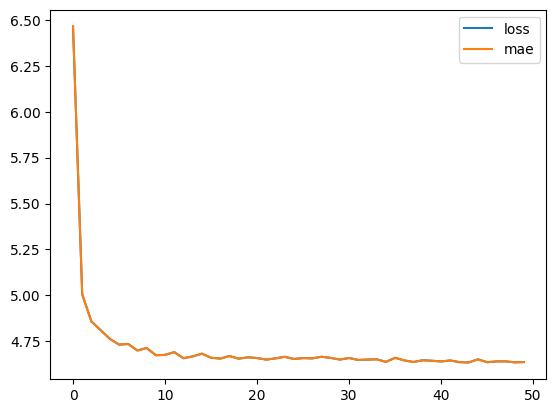

In [29]:
import tensorflow as tf
tf.random.set_seed(42)

# Setup Tensorflow Neural network regression model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit model
history = model_1.fit(X_train_normal, y_train, epochs=50, verbose=False)
pd.DataFrame(history.history).plot()

In [30]:
model_1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 885 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,772 (6.93 KB)

In [31]:
# Evaluate model-1
model_1.evaluate(X_test_normal, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7571 - mae: 4.7571


[4.55818510055542, 4.55818510055542]

In [32]:
# Predictions
y_pred_1 = model_1.predict(X_test_normal)
y_pred_1, y_test

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([[ 1.4935699],
        [ 5.5542965],
        [ 8.121083 ],
        ...,
        [27.31523  ],
        [ 6.8530655],
        [ 2.3843994]], dtype=float32),
 1475     1.91
 33       2.93
 8        6.99
 4571     4.16
 894      3.65
         ...  
 4327     5.70
 1826     6.90
 1521    22.90
 963      4.80
 1628     5.65
 Name: car_price_lakh_numeric, Length: 1098, dtype: float32)

In [33]:
# Compute MAE, MSE
def compute_mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))

def compute_mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))
# Evaluation metrics
mae = compute_mae(y_test, y_pred_1)
mse = compute_mse(y_test, y_pred_1)
print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 4.55818510055542
MSE: 170.69183349609375


Model 2 with "car_model_name" feature included as one hot vectors


In [34]:
# Take out x and y data
x = data[["fuel_type", "transmission", "car_company_name", "car_model_name", "manufacture", "kms_deriven_numeric", "engine_cc_numeric", "seats_numeric", "ownership_numeric"]]
# x["car_model_name"] = data["car_model_name"]
y = data["car_price_lakh_numeric"]

from sklearn.model_selection import train_test_split
# Train, Test Data Sets Splitting
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.2, random_state=42)

# Column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["manufacture", "kms_deriven_numeric", "engine_cc_numeric", "seats_numeric", "ownership_numeric"]),
    (OneHotEncoder(handle_unknown="ignore"), ["fuel_type", "transmission", "car_company_name", "car_model_name"])
)

# Fit Column Transformer on training data
ct.fit(X_train_2)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['manufacture', 'kms_deriven_numeric',
                                  'engine_cc_numeric', 'seats_numeric',
                                  'ownership_numeric']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['fuel_type', 'transmission',
                                  'car_company_name', 'car_model_name'])])

<Axes: >

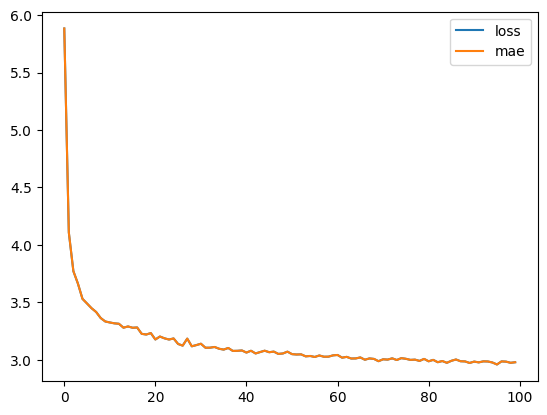

In [35]:
X_train_normal_2 = ct.transform(X_train_2)
X_test_normal_2 = ct.transform(X_test_2)

# Setup Tensorflow Neural network regression model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit model
history = model_2.fit(X_train_normal_2, y_train_2, epochs=100, verbose=False)
pd.DataFrame(history.history).plot()

In [36]:
# Evaluate model-2
model_2.evaluate(X_test_normal_2, y_test_2)

# Predictions
y_pred_2 = model_2.predict(X_test_normal_2)
y_pred_2, y_test_2

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8261 - mae: 2.8261 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([[ 1.4009964],
        [ 4.501585 ],
        [ 8.548955 ],
        ...,
        [22.825884 ],
        [ 8.298166 ],
        [ 2.5363064]], dtype=float32),
 1475     1.91
 33       2.93
 8        6.99
 4571     4.16
 894      3.65
         ...  
 4327     5.70
 1826     6.90
 1521    22.90
 963      4.80
 1628     5.65
 Name: car_price_lakh_numeric, Length: 1098, dtype: float32)

In [37]:
# Model-2 summary
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │         4,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,121 (51.26 KB)

 Trainable params: 4,373 (17.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,748 (34.18 KB)

Model-3 with reduced Hidden layer neurons

Using the same training data from Model-2



<Axes: >

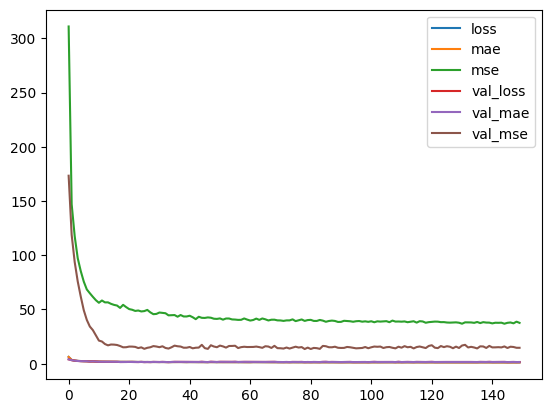

In [38]:
# Setup Tensorflow Neural network regression model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.keras.activations.tanh), # Changed activation function
    tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # Reduced dense neuron count & Changed activation function
    # tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae", "mse"]
)
# Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/10)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit model
history = model_3.fit(X_train_normal_2, y_train_2, epochs=150, validation_data=(X_test_normal_2, y_test_2), verbose=False) # callbacks=[lr_scheduler]
pd.DataFrame(history.history).plot()

In [39]:
# Evaluate model-3
model_3.evaluate(X_test_normal_2, y_test_2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6185 - mae: 1.6185 - mse: 15.8274


[1.556645393371582, 1.556645393371582, 14.677833557128906]

In [40]:
model_3.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │         4,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,013 (50.84 KB)

 Trainable params: 4,337 (16.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,676 (33.89 KB)

Model comparisons

Model 1 MAE: 4.7867

Model 2 MAE: 2.8034

Model 3 MAE: 1.6329

Model 3 is performing better than initial versions of model

Takaways

Normalization - Input features MinMaxScaling or Normaization helped reducing MAE

Hidden Layer count - Increase in hidden layer count impacted model output

Activation function - Update of tanh and ReLu activation functions improved model predictions

Learning Rate - Optimized lr enhances quick learning of model

Optimizer - Adam optimizer performed better than SGD optimizer

Longer training epochs - Improved model metrics

